In [52]:
import qutip as qt
import numpy as np
import matplotlib.pyplot as plt

In [72]:
# constants
hbar = 1
omega = 1
mass = 1
lamb = 10

# creation and annihilation operators
N = 20
adag = qt.create(N)
a = qt.destroy(N)

# x and p ops in creation and annihilation basis
x_op = (a + adag) * np.sqrt(hbar / 2 / mass / omega)
p_op = 1j * (adag - a) * np.sqrt(mass * omega * hbar / 2)

# create hamiltonian
kineticTerm = p_op**2 / 2 / mass
potentialTerm = 0.5 * mass * omega**2 * x_op**2
perturbationTerm = lamb / 24 * x_op**4
H0 = kineticTerm + potentialTerm + perturbationTerm

# diagonalize
eigenvalues, eigenstates = H0.eigenstates()

# driving operator
def drive(t, V0, wd):
    return V0 * np.cos(wd * t)

# initial state
tlist = np.linspace(0, 200, 200)
psi0 = qt.basis(N, 0)
psi1 = qt.basis(N, 1)
wd = eigenvalues[1] - eigenvalues[0] # implicitly (eigenvalues[1] - eigenvalues[0]) / hbar but hbar = 1
print(wd)

1.562184045934416


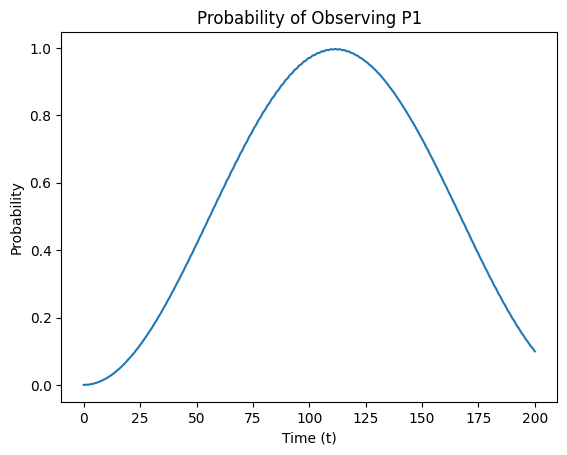

In [73]:
# problem 5 part b
V0 = 0.05
wlist = np.linspace(1.562184045934416, 1.562184045934416, 1)

for w in wlist:
    args = {"V0": V0, "wd": w}

    # time evolve
    H = [H0, [x_op, drive]]
    psi_t = qt.sesolve(H, eigenstates[0], tlist, args=args)

    P1 = []

    for state in psi_t.states:
        P1.append(np.abs(eigenstates[1].dag() * state)**2)

    plt.plot(tlist, P1, label=f"Omega {w}")

plt.title("Probability of Observing P1")
plt.ylabel("Probability")
plt.xlabel("Time (t)")
# plt.legend()
plt.show()

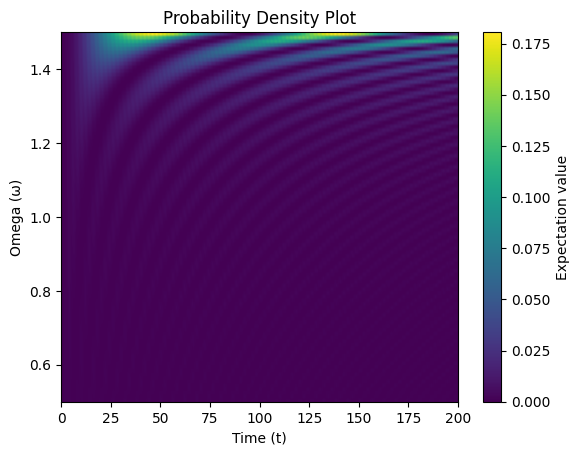

In [ ]:
# problem 5 part c
wlist = np.linspace(1.25, 1.75, 100)
probabilties = []
tempProb = []

for w in wlist:
    args = {"V0": V0, "wd": w}
    
    # time evolve
    H = [H0, [x_op, drive]]
    psi_t = qt.sesolve(H, eigenstates[0], tlist, args=args)
    tempProb = []

    for states in psi_t.states:

        prob = np.abs(eigenstates[1].dag() * states)**2
        tempProb.append(prob)

    probabilties.append(tempProb)

plt.imshow(probabilties,
           extent=[tlist.min(), tlist.max(), wlist.min(), wlist.max()],
           origin='lower',
           aspect='auto',
           cmap='viridis')
plt.colorbar(label="Expectation value")

plt.xlabel("Time (t)")
plt.ylabel("Omega (ω)")
plt.title("Probability Density Plot")
plt.show()

In [56]:
more_probs = []
for i in range(len(probabilties)):
    more_probs.append(max(probabilties[i]))
print(max(more_probs))


0.18061270037176919
